# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


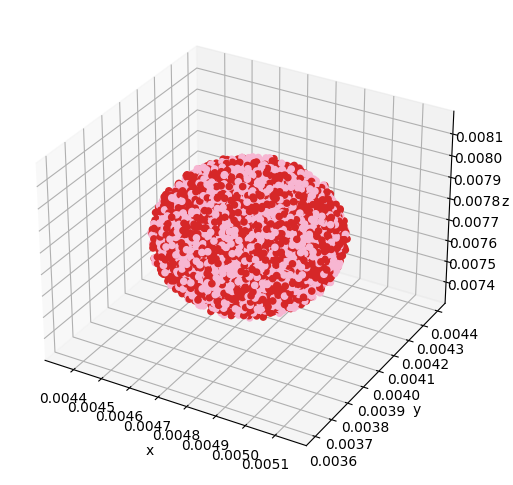

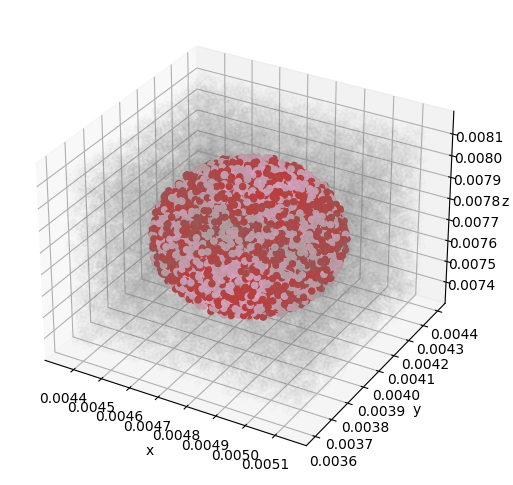

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


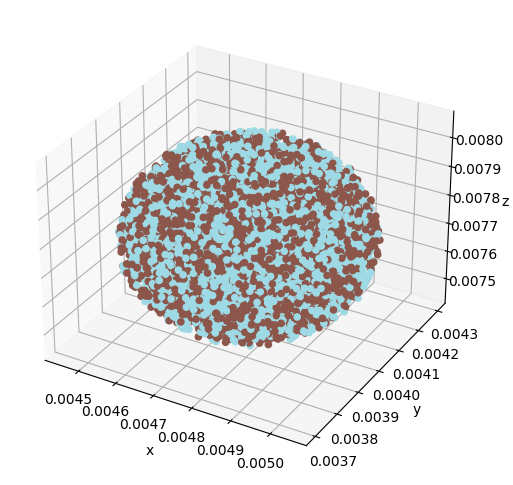

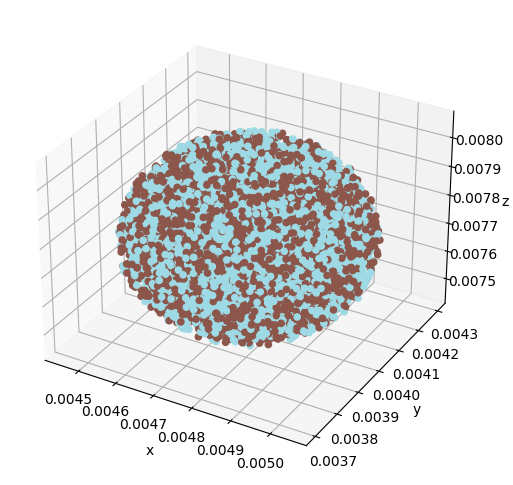

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

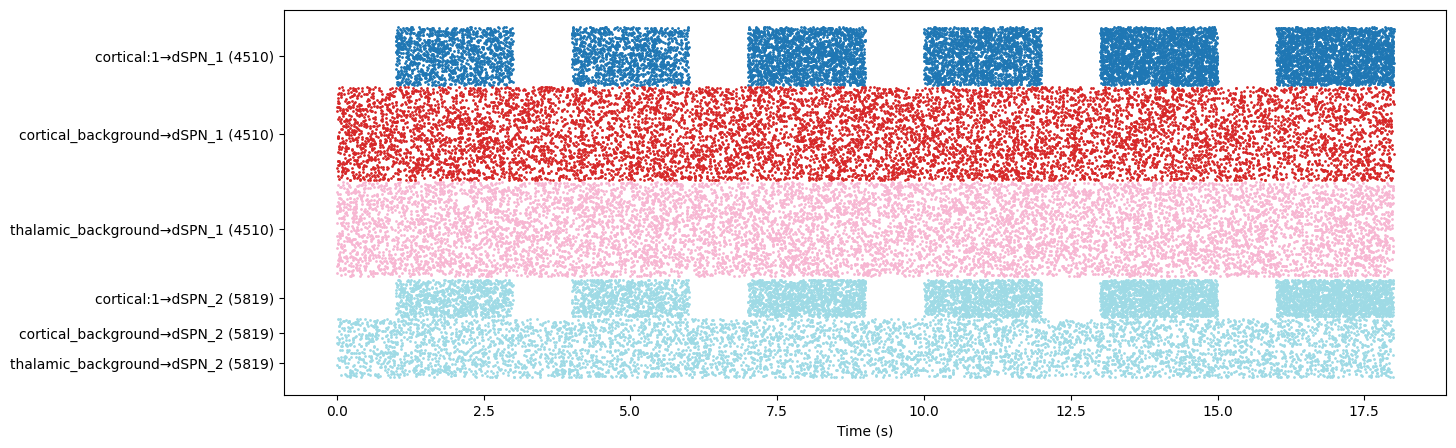

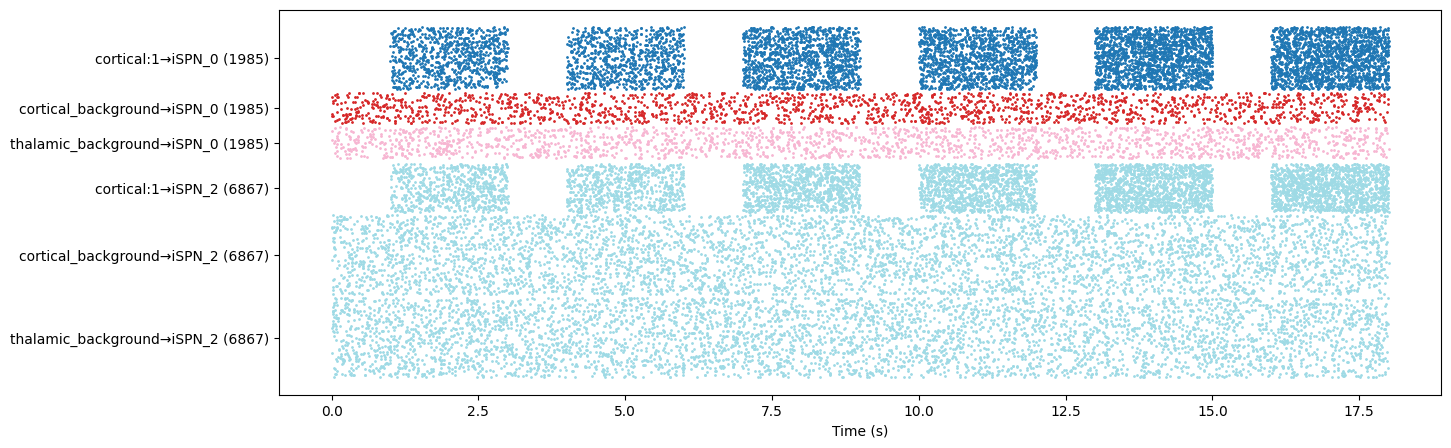

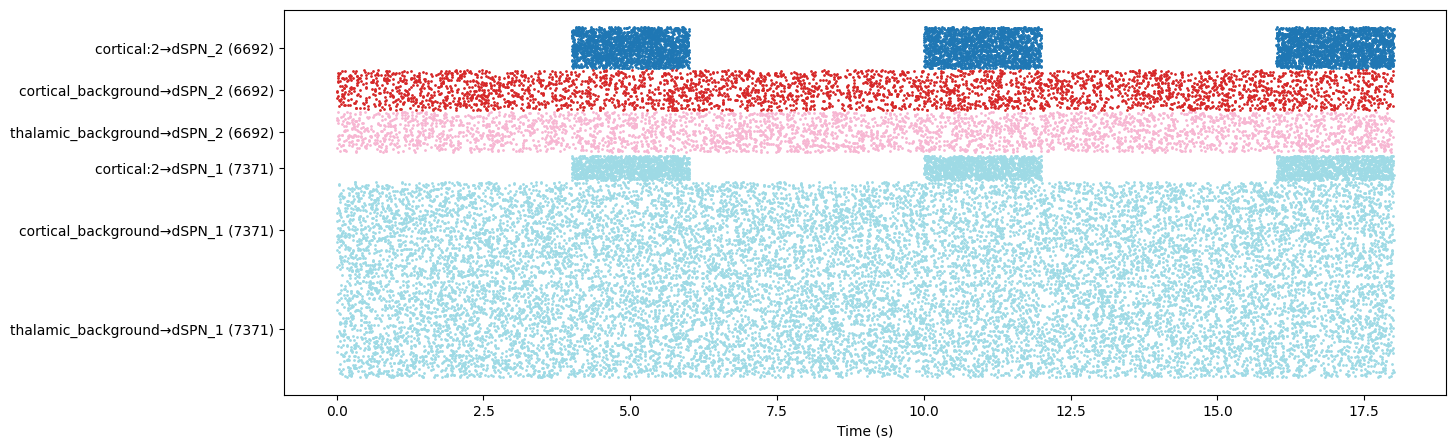

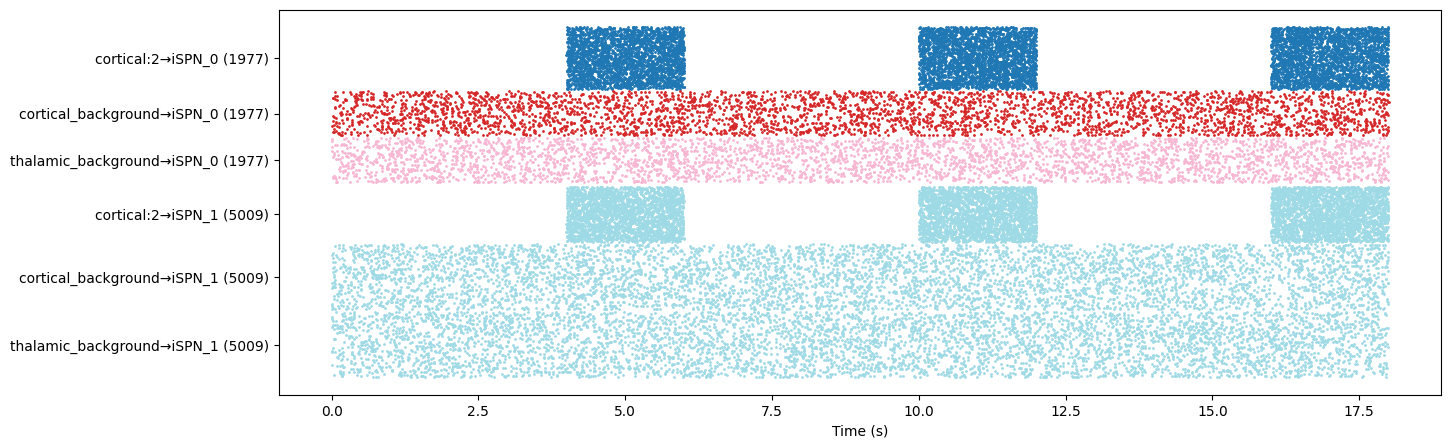

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
193: (dSPN_0, p1863c9a5, mf702205f)
202: (dSPN_0, p1863c9a5, m22be6817)
289: (dSPN_3, pf1939474, m019100c8)
537: (dSPN_0, pb0529fb9, mf702205f)
551: (dSPN_0, p7aa400d6, m9fda9b20)
565: (dSPN_0, pb0529fb9, mbb8e5b24)
740: (dSPN_0, p1863c9a5, mf702205f)
923: (dSPN_0, p1863c9a5, mc710c1a4)
1103: (dSPN_0, p1863c9a5, mc710c1a4)
1422: (dSPN_0, pd01ac450, mc710c1a4)
1426: (dSPN_0, p7aa400d6, mc710c1a4)
1431: (dSPN_0, p1863c9a5, m37886c78)
1437: (dSPN_0, p7aa400d6, m22be6817)
1443: (dSPN_0, p1863c9a5, mf702205f)
1445: (dSPN_0, p1863c9a5, mc710c1a4)
1489: (dSPN_1, pdcbfd03a, m82894e90)
1799: (dSPN_0, pe1ec8fbd, m22be6817)
1807: (dSPN_0, pb0529fb9, mf702205f)
1816: (dSPN_0, p7aa400d6, mc710c1a4)
1821: (dSPN_0, p8bf90d1f, mf702205f)
2163: (dSPN_0, p7aa400d6, mf702205f)
2181: (dSPN_0, p8bf90d1f, m22be6817)
2183: (dSPN_0, p7aa400d6, mbb

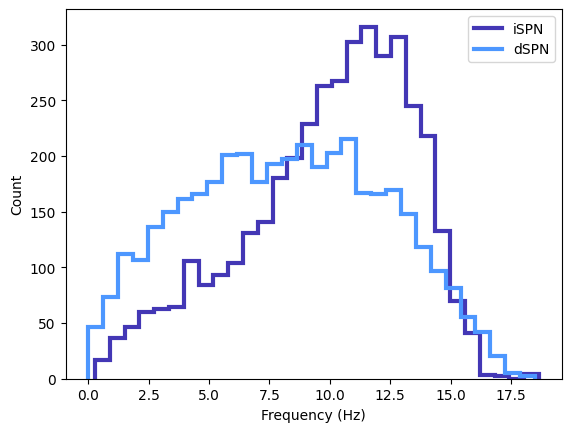

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


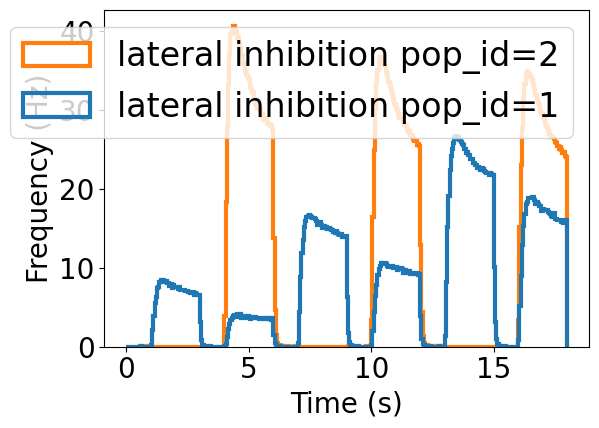

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
114: (iSPN_2, p3e12143b, m54d1813f)
412: (iSPN_2, p3e12143b, m54d1813f)
566: (dSPN_0, pb0529fb9, m9fda9b20)
578: (dSPN_0, pd01ac450, m37886c78)
784: (dSPN_3, pf1939474, m17af04cc)
1107: (dSPN_0, p1863c9a5, m37886c78)
1110: (dSPN_0, p7aa400d6, m22be6817)
1450: (dSPN_0, pb0529fb9, m37886c78)
1453: (dSPN_0, p7aa400d6, m22be6817)
1792: (dSPN_0, pe6ec2d4b, m9fda9b20)
2117: (iSPN_3, p57956f10, m1083058d)
2166: (dSPN_0, p1863c9a5, m37886c78)
2441: (iSPN_3, p57956f10, m1083058d)
2492: (dSPN_0, p1863c9a5, mc710c1a4)
2596: (iSPN_3, p57956f10, m1083058d)
2630: (dSPN_0, p7aa400d6, m9fda9b20)
3010: (iSPN_3, p57956f10, m1083058d)
3057: (dSPN_0, pc8cbdb24, mc710c1a4)
3112: (dSPN_0, pb0529fb9, mf702205f)
3368: (dSPN_3, pf1939474, m99fd6c60)
3488: (dSPN_0, p7aa400d6, m37886c78)
3574: (dSPN_2, pb267a31a, mf0350288)
3597: (dSPN_3, pf1939474, m1

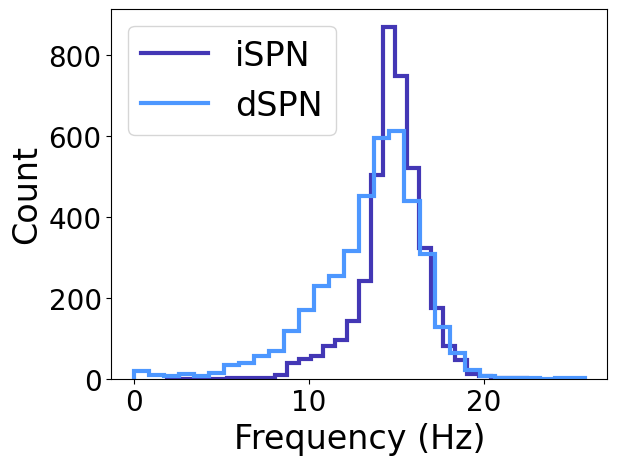

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


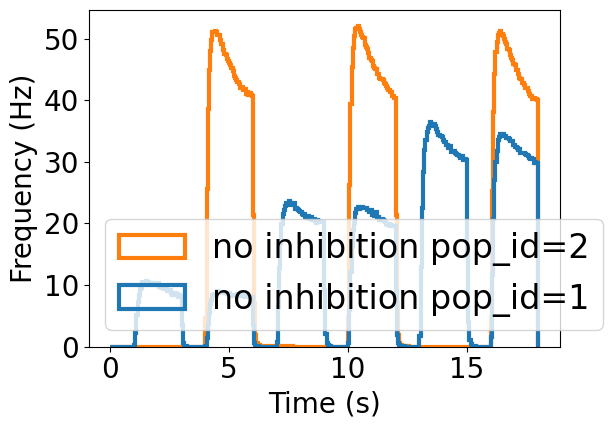

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


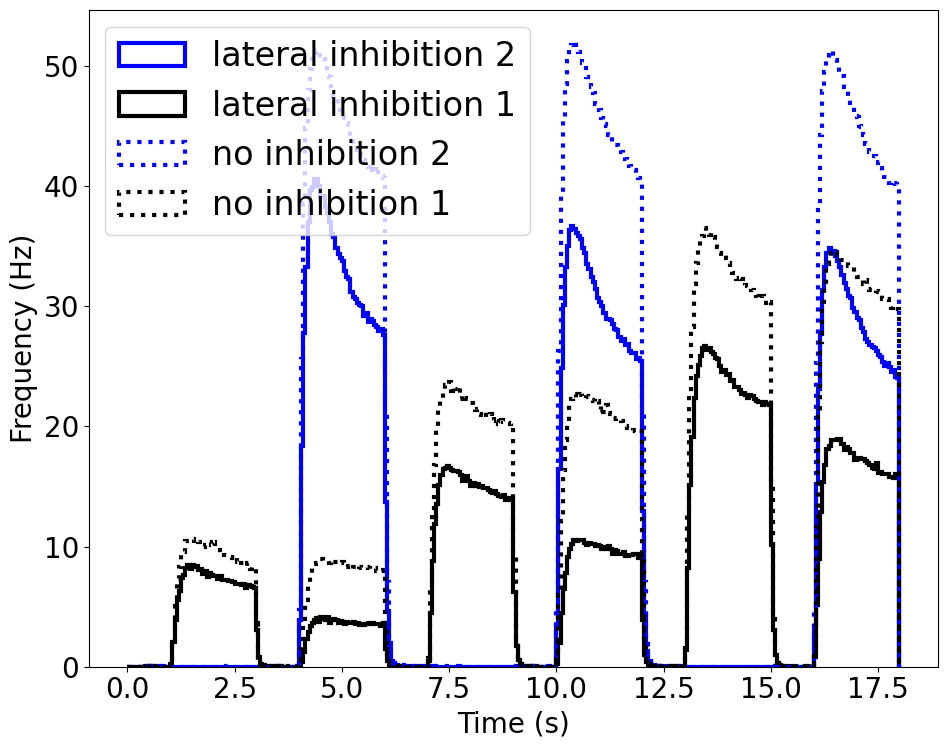

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8), colour=["black", "blue"])
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True, linestyle=":", colour=["black", "blue"])

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 7.02 +/- 0.07	Freq 2: 0.01 +/- 0.00
Freq 1: 3.59 +/- 0.06	Freq 2: 29.99 +/- 0.17
Freq 1: 14.57 +/- 0.11	Freq 2: 0.00 +/- 0.00
Freq 1: 9.52 +/- 0.11	Freq 2: 27.59 +/- 0.18
Freq 1: 22.64 +/- 0.14	Freq 2: 0.00 +/- 0.00
Freq 1: 16.49 +/- 0.16	Freq 2: 26.20 +/- 0.19


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 9.02 +/- 0.09	Freq 2: 0.01 +/- 0.00
Freq 1: 8.24 +/- 0.08	Freq 2: 42.70 +/- 0.11
Freq 1: 20.79 +/- 0.11	Freq 2: 0.00 +/- 0.00
Freq 1: 20.45 +/- 0.12	Freq 2: 43.01 +/- 0.11
Freq 1: 31.63 +/- 0.11	Freq 2: 0.01 +/- 0.00
Freq 1: 31.08 +/- 0.12	Freq 2: 42.20 +/- 0.11


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 3705/4000	Neurons active 2: 18/4000
Neurons active 1: 3011/4000	Neurons active 2: 3978/4000
Neurons active 1: 3937/4000	Neurons active 2: 9/4000
Neurons active 1: 3636/4000	Neurons active 2: 3959/4000
Neurons active 1: 3965/4000	Neurons active 2: 10/4000
Neurons active 1: 3832/4000	Neurons active 2: 3918/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 3732/4000	Neurons active 2: 17/4000
Neurons active 1: 3701/4000	Neurons active 2: 3987/4000
Neurons active 1: 3934/4000	Neurons active 2: 18/4000
Neurons active 1: 3923/4000	Neurons active 2: 3984/4000
Neurons active 1: 3959/4000	Neurons active 2: 19/4000
Neurons active 1: 3957/4000	Neurons active 2: 3980/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
193: (dSPN_0, p1863c9a5, mf702205f)
202: (dSPN_0, p1863c9a5, m22be6817)
289: (dSPN_3, pf1939474, m019100c8)
537: (dSPN_0, pb0529fb9, mf702205f)
551: (dSPN_0, p7aa400d6, m9fda9b20)
565: (dSPN_0, pb0529fb9, mbb8e5b24)
740: (dSPN_0, p1863c9a5, mf702205f)
923: (dSPN_0, p1863c9a5, mc710c1a4)
1103: (dSPN_0, p1863c9a5, mc710c1a4)
1422: (dSPN_0, pd01ac450, mc710c1a4)
1426: (dSPN_0, p7aa400d6, mc710c1a4)
1431: (dSPN_0, p1863c9a5, m37886c78)
1437: (dSPN_0, p7aa400d6, m22be6817)
1443: (dSPN_0, p1863c9a5, mf702205f)
1445: (dSPN_0, p1863c9a5, mc710c1a4)
1489: (dSPN_1, pdcbfd03a, m82894e90)
1799: (dSPN_0, pe1ec8fbd, m22be6817)
1807: (dSPN_0, pb0529fb9, mf702205f)
1816: (dSPN_0, p7aa400d6, mc710c1a4)
1821

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4  8 13 14 15 16 20 21 23 25 26 27 29 31 32 33 35 37 40 43 44 45 46
 50 54 55 59 63 66]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--iSPN-dSPN.pdf


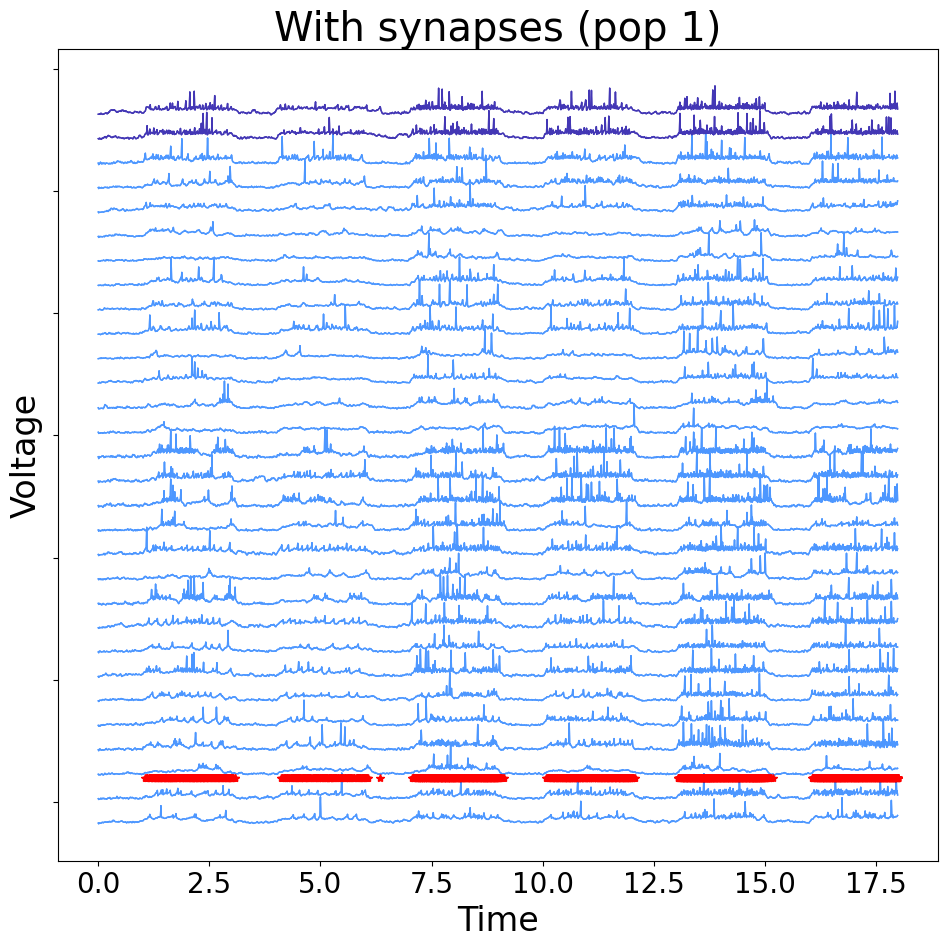

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  9 10 11 12 17 18 19 22 24 28 30 34 36 38 39 41 42 47
 48 49 51 52 53 56]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


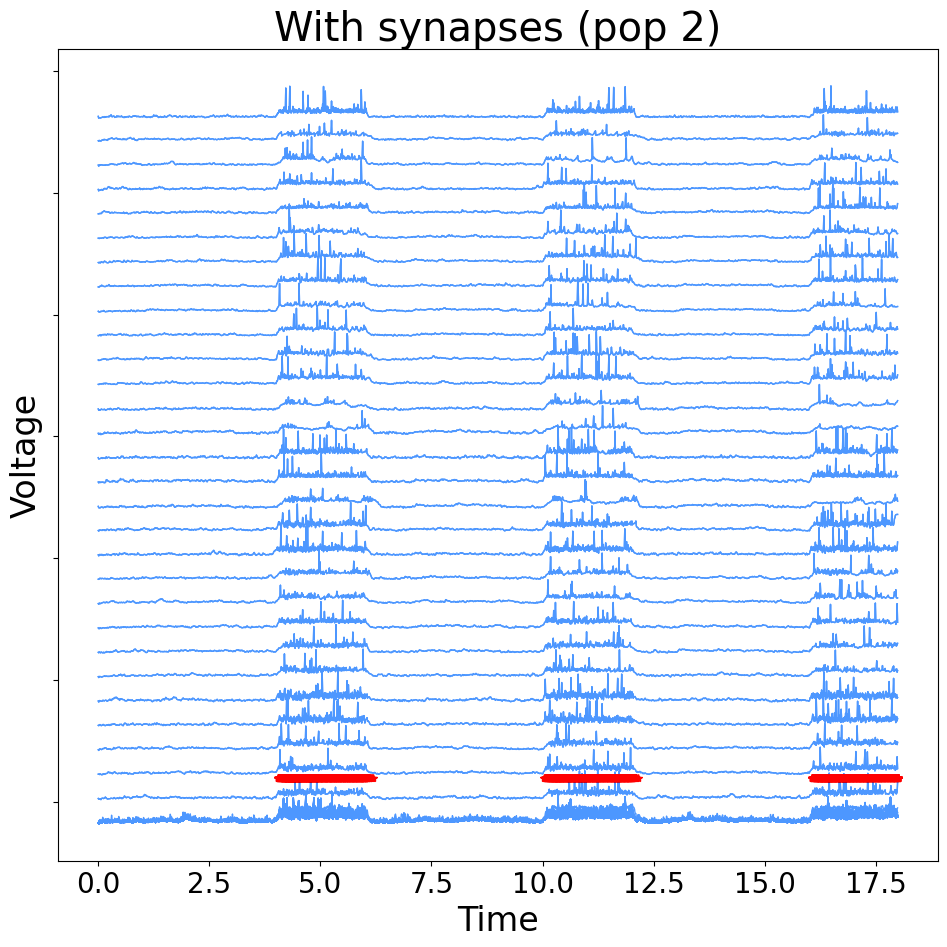

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
114: (iSPN_2, p3e12143b, m54d1813f)
412: (iSPN_2, p3e12143b, m54d1813f)
566: (dSPN_0, pb0529fb9, m9fda9b20)
578: (dSPN_0, pd01ac450, m37886c78)
784: (dSPN_3, pf1939474, m17af04cc)
1107: (dSPN_0, p1863c9a5, m37886c78)
1110: (dSPN_0, p7aa400d6, m22be6817)
1450: (dSPN_0, pb0529fb9, m37886c78)
1453: (dSPN_0, p7aa400d6, m22be6817)
1792: (dSPN_0, pe6ec2d4b, m9fda9b20)
2117: (iSPN_3, p57956f10, m1083058d)
2166: (dSPN_0, p1863c9a5, m37886c78)
2441: (iSPN_3, p57956f10, m1083058d)
2492: (dSPN_0, p1863c9a5, mc710c1a4)
2596: (iSPN_3, p57956f10, m1083058d)
2630: (dSPN_0, p7aa400d6, m9fda9b20)
3010: (iSPN_3, p57956f10, m1083058d)
3057: (dSPN_0, pc8cbdb24, mc710c1a4)
3112: (dSPN_0, pb0529fb9, mf702205f)
336

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4  8 13 14 15 16 20 21 23 25 26 27 29 31 32 33 35 37 40 43 44 45 46
 50 54 55 59 63 66]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--iSPN-dSPN.pdf


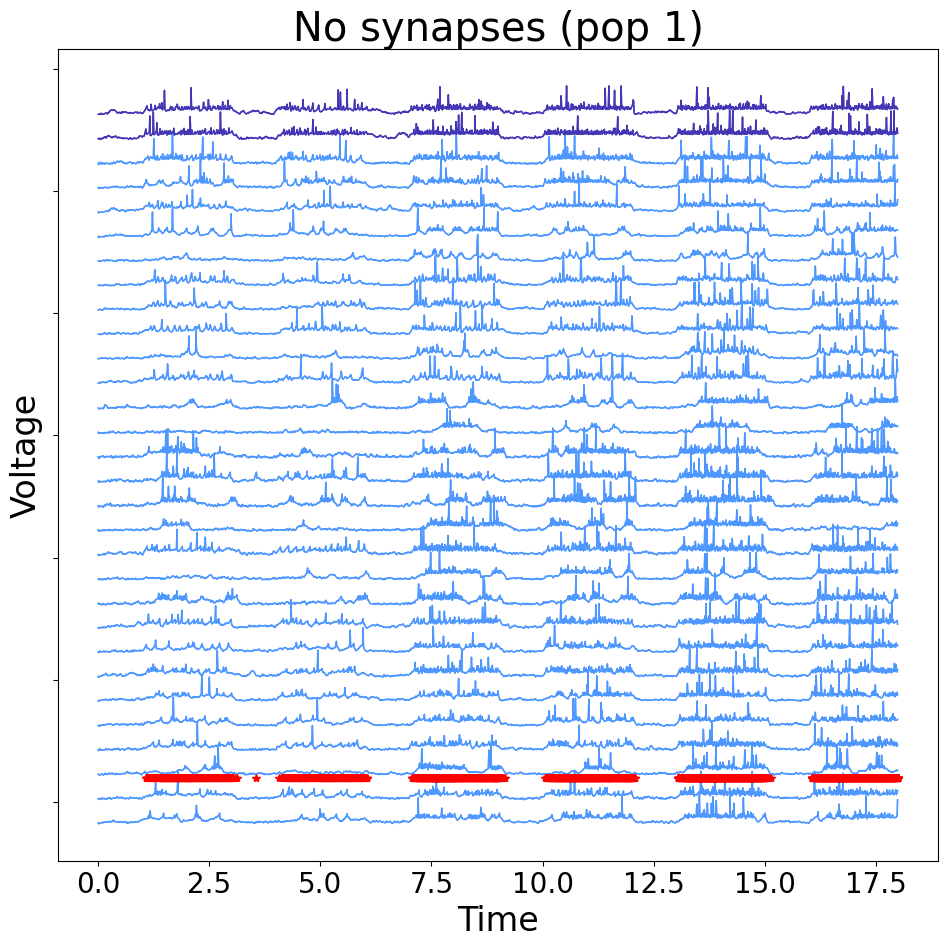

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  9 10 11 12 17 18 19 22 24 28 30 34 36 38 39 41 42 47
 48 49 51 52 53 56]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


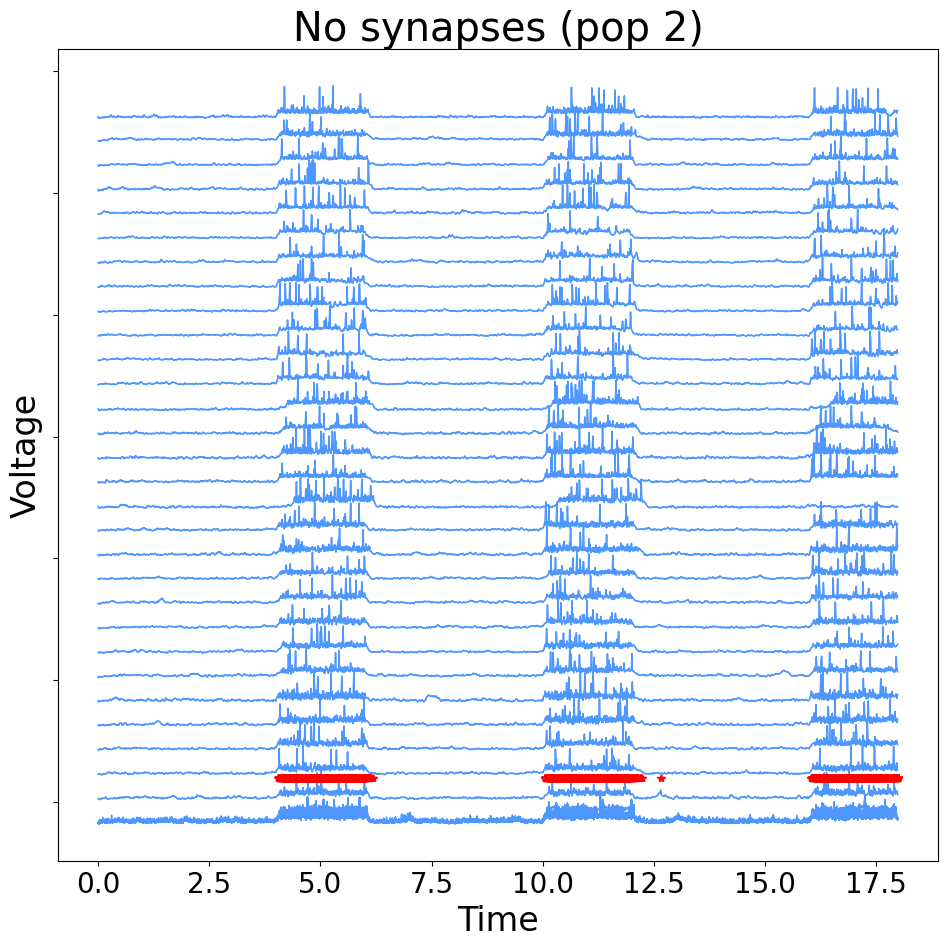

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [ 740 1426 1431 1807 2181 2620 2635 2640 2649 2651 3055 3056 3112 3114
 3427 3601 3839 4165 4166 4466 4825 4841 4850 4851 5392 5395 5407 5730
 6111 6335 6638 7052 7059 7445 7685]
Plotted 35 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


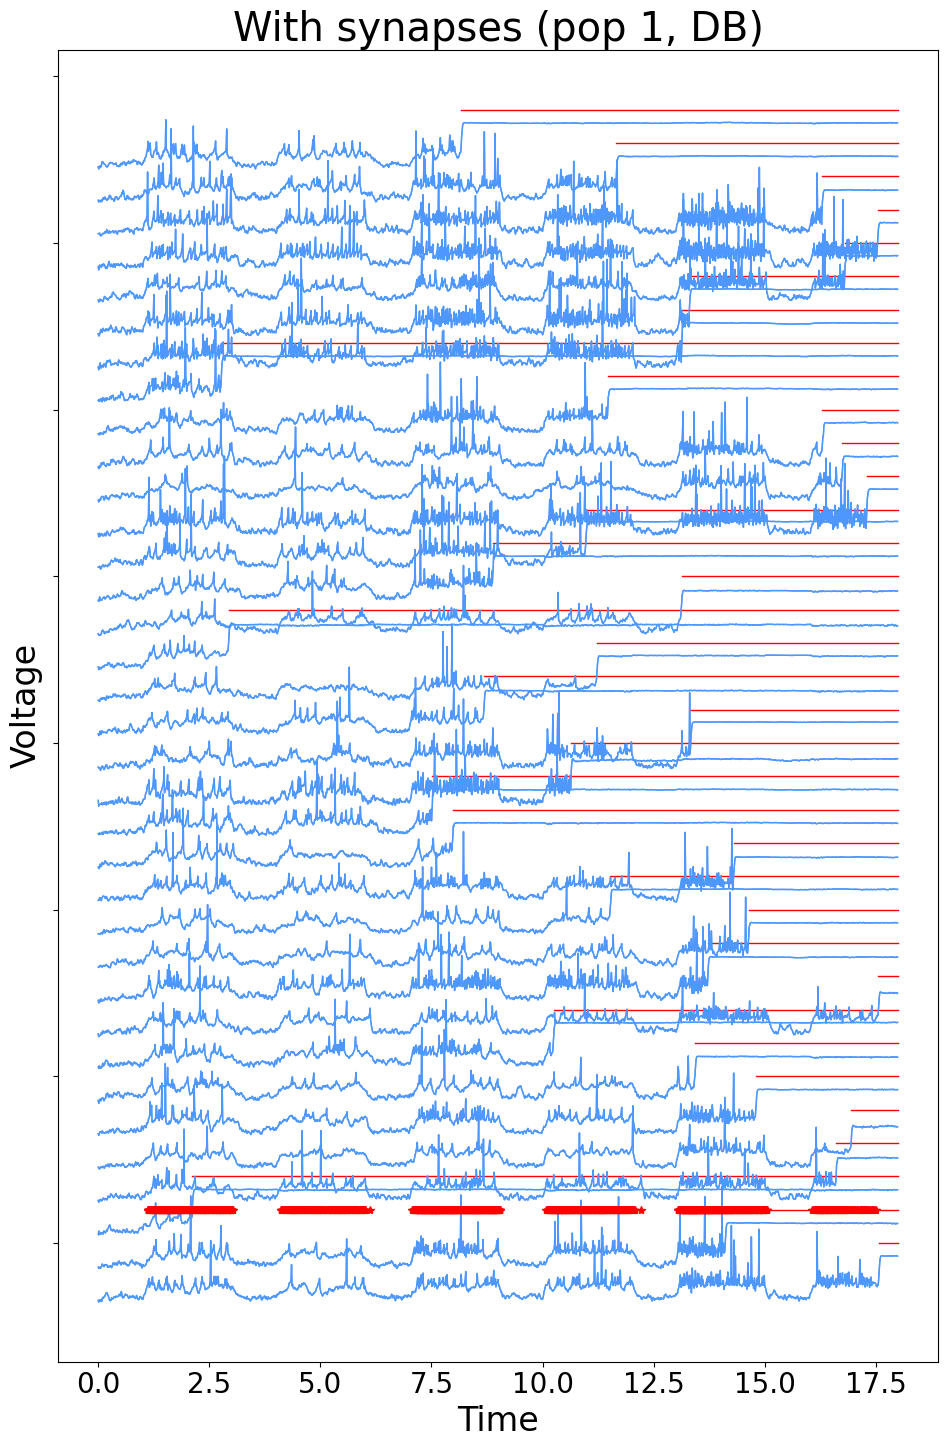

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [ 193  202  289  537  551  565  923 1103 1422 1437 1443 1445 1489 1799
 1816 1821 2163 2183 2606 2634 2647 3118 3425 3467 3489 3816 3830 3842
 4131 4154 4627 4857 5154 5163 5174 5396 5715 5733 5742 5745 5753 6337
 6342 6352 6924 7356 7446 7457 7482 7756]
Plotted 50 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


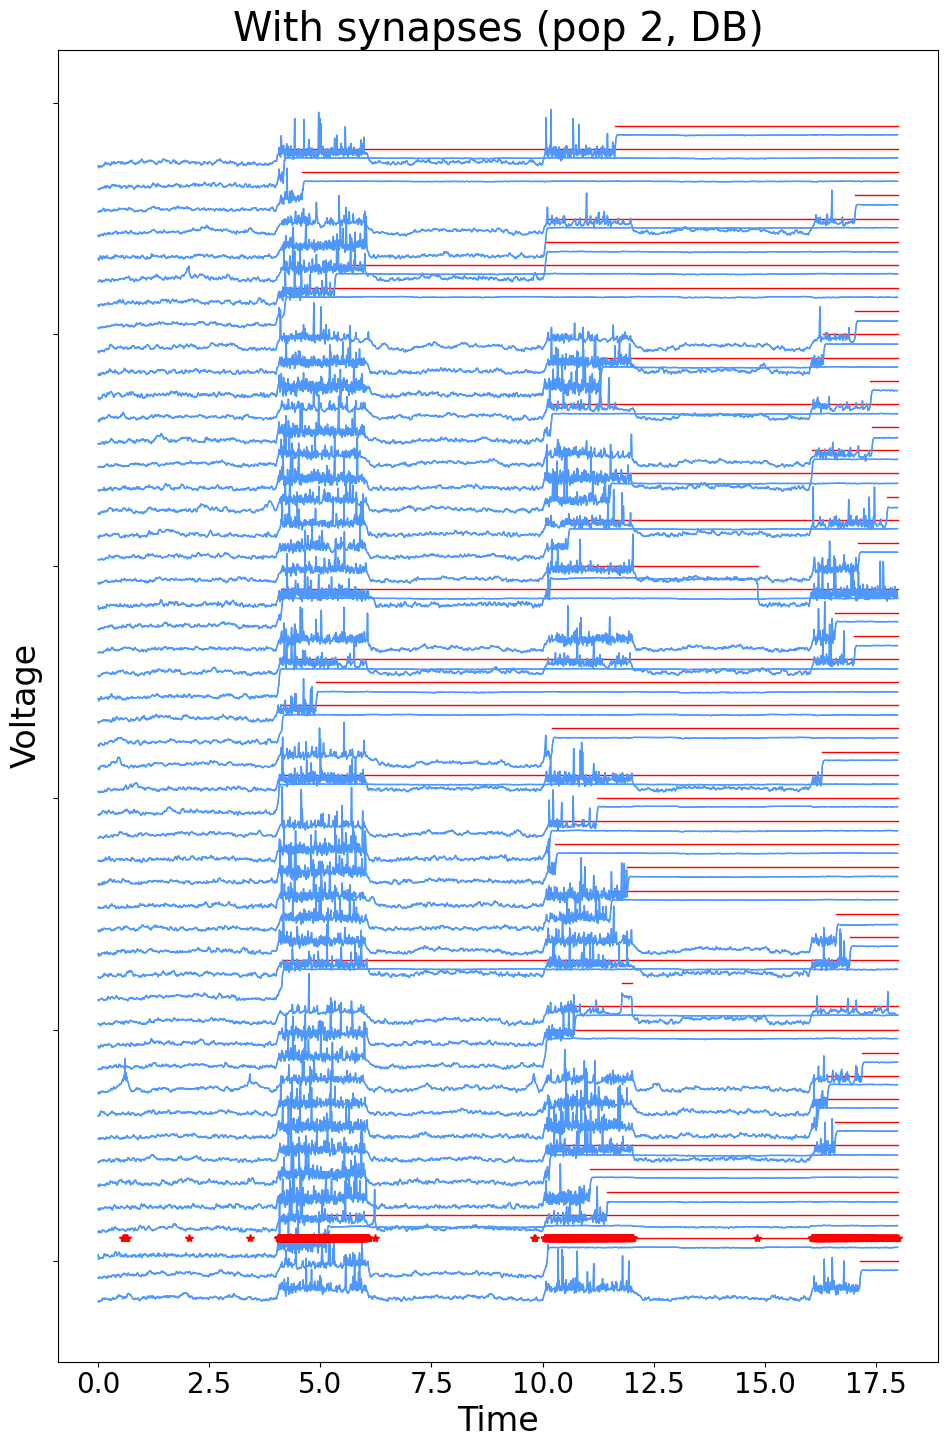

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 578 1107 1450 1453 2117 2166 2630 3112 3368 3488 3574 3847 4135 4165
 4169 4471 5619 5730 6335 6645 7047 7056 7463 7873 7881]
Plotted 25 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--iSPN-dSPN.pdf


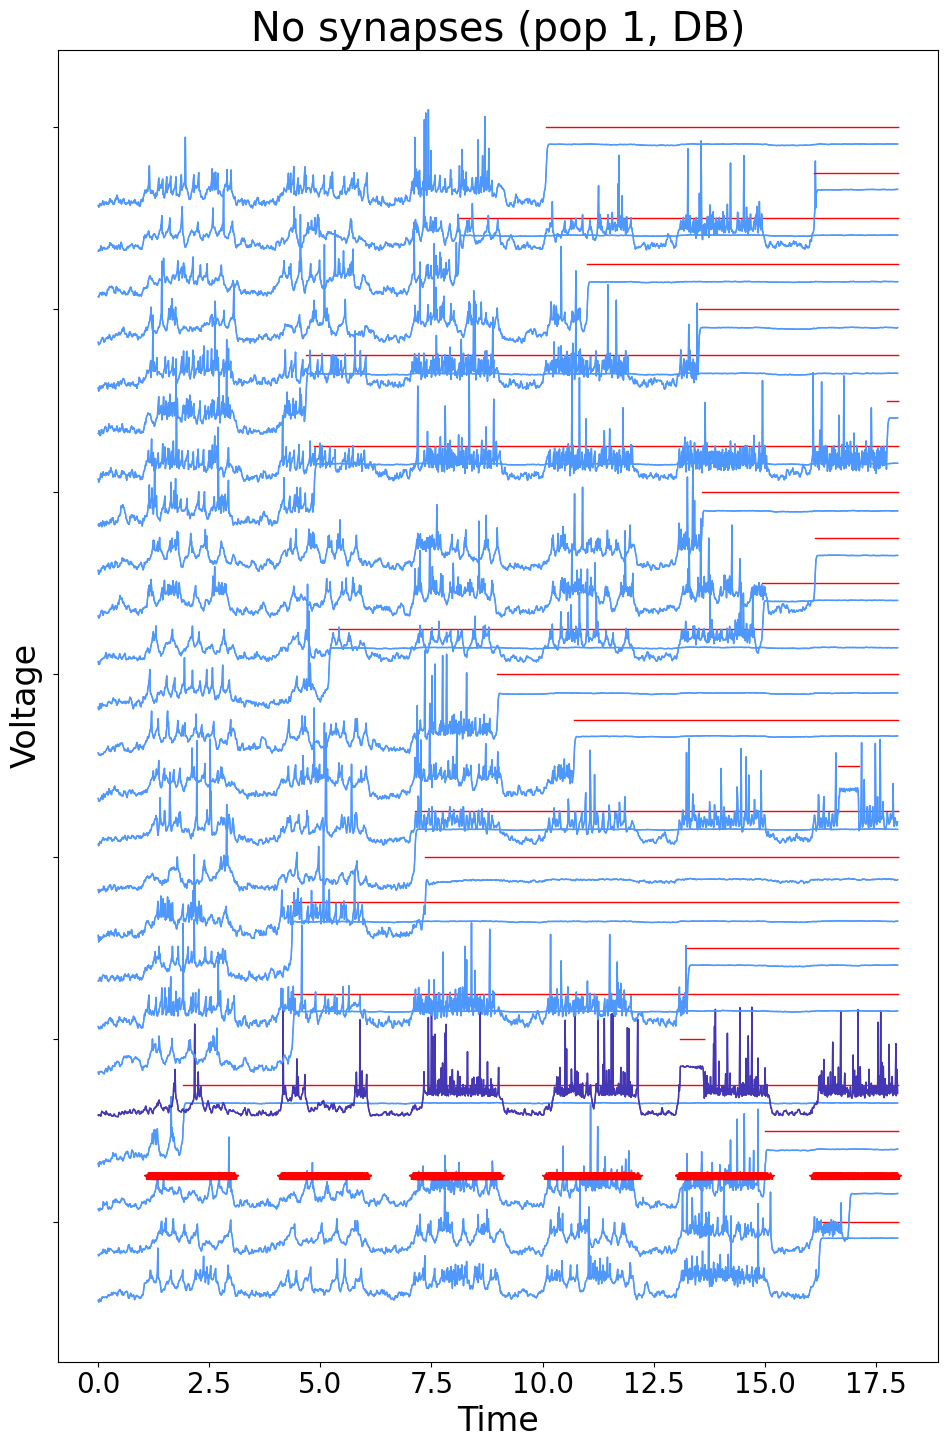

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 114  412  566  784 1110 1792 2441 2492 2596 3010 3057 3597 4383 4830
 5733 5754 6432 6904 7222]
Plotted 19 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


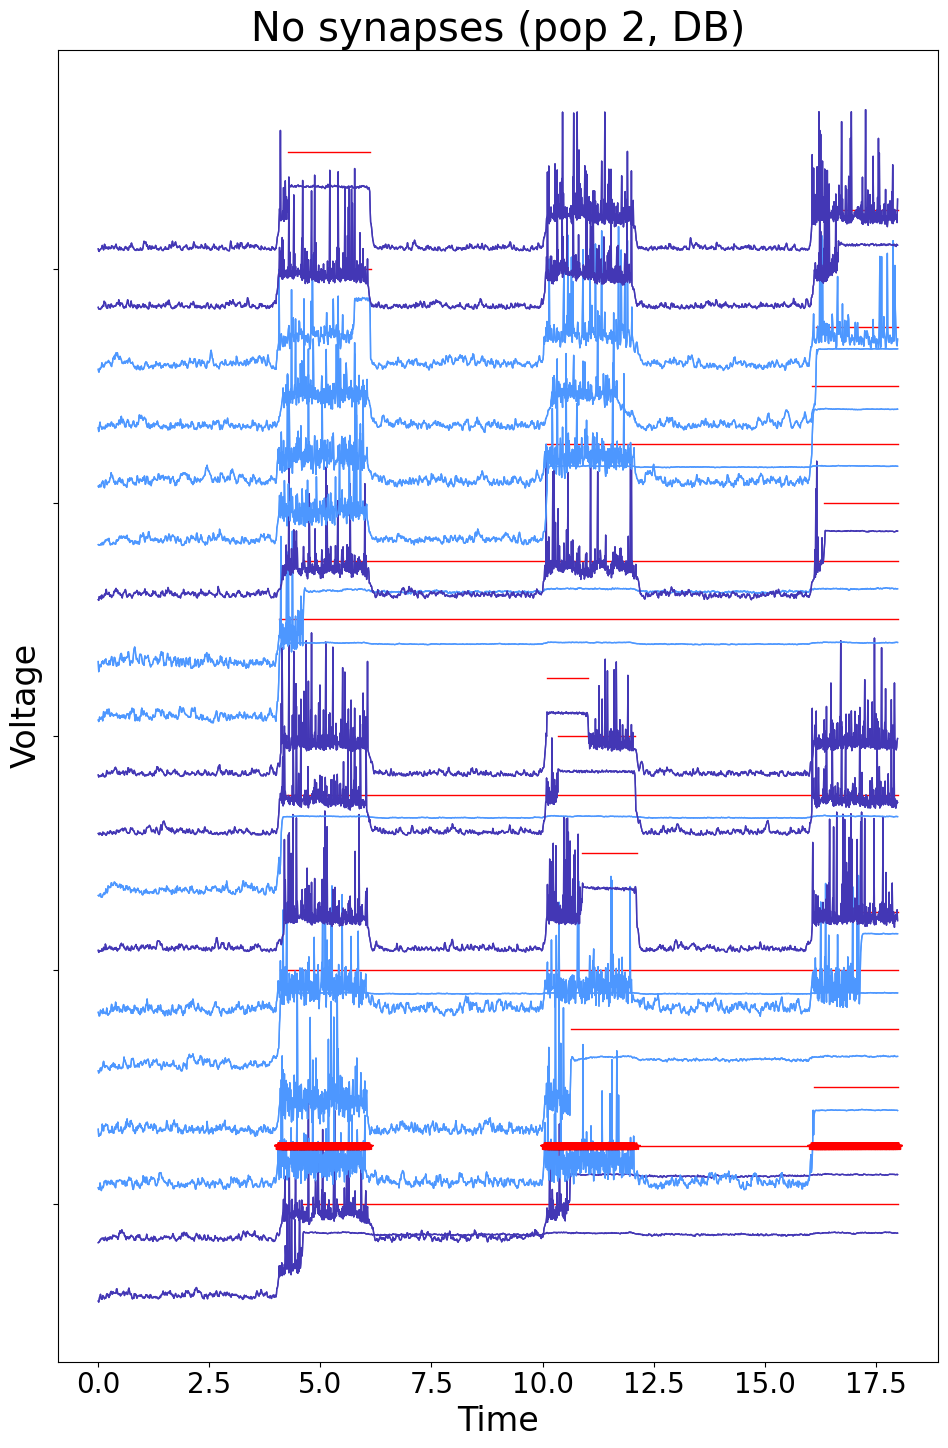

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)